In [1]:
import os
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [2]:
categories = pd.read_csv('/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/categories.csv')
train_labels = pd.read_csv('/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/train_labeled.csv')

In [3]:
# Define a dataset class for labeled images
class LabeledImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = self.data.iloc[idx, 1]  # Assuming the label is in the second column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define a dataset class for unlabeled images
class UnlabeledImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_paths = [os.path.join(root_dir, img) for img in os.listdir(root_dir)]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = self.image_paths[idx]
        image = Image.open(img_name).convert("RGB")
        
        if self.transform:
            image = self.transform(image)

        return image  # No label returned

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # TODO: Adjust mean and std as needed
])

In [5]:
# Initialize datasets
labeled_dataset = LabeledImageDataset(csv_file='/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/train_labeled.csv', root_dir='/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/train/labeled', transform=transform)
unlabeled_dataset = UnlabeledImageDataset(root_dir='/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/train/unlabeled', transform=transform)

# Create data loaders
labeled_loader = DataLoader(labeled_dataset, batch_size=32, shuffle=True)
unlabeled_loader = DataLoader(unlabeled_dataset, batch_size=32, shuffle=False)

# Load the test images without labels
test_dataset = UnlabeledImageDataset(root_dir='/media/nvme1/mitquach/ucsc-cse-244-a-2024-fall-final-project/test', transform=transform)

Labeled images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


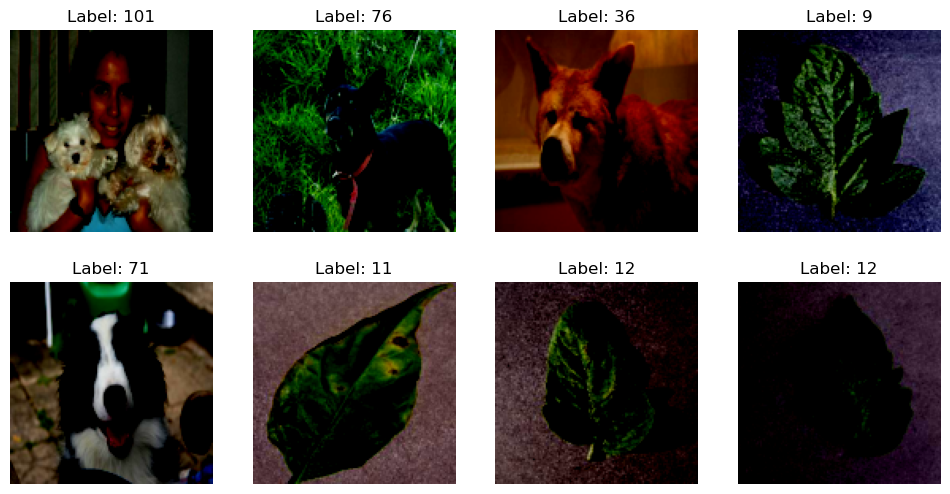

Unlabeled images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


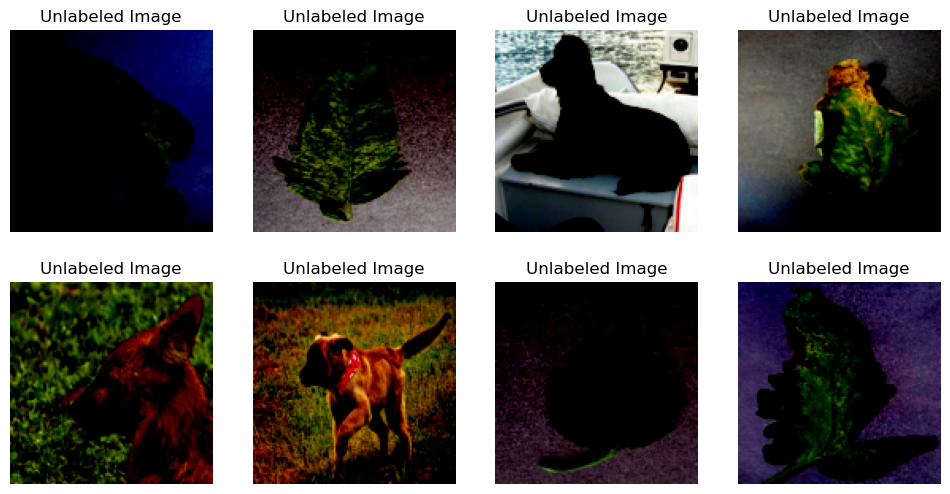

In [6]:
import matplotlib.pyplot as plt

# Function to display a batch of labeled images with labels
def show_labeled_batch(data_loader):
    images, labels = next(iter(data_loader))
    plt.figure(figsize=(12, 6))
    for idx in range(min(8, len(images))):
        plt.subplot(2, 4, idx + 1)
        plt.imshow(images[idx].permute(1, 2, 0))  # Convert from Tensor format
        plt.title(f'Label: {labels[idx].item()}')
        plt.axis('off')
    plt.show()

# Function to display a batch of unlabeled images
def show_unlabeled_batch(data_loader):
    images = next(iter(data_loader))
    plt.figure(figsize=(12, 6))
    for idx in range(min(8, len(images))):
        plt.subplot(2, 4, idx + 1)
        plt.imshow(images[idx].permute(1, 2, 0))  # Convert from Tensor format
        plt.title("Unlabeled Image")
        plt.axis('off')
    plt.show()

# Display a batch of labeled images
print("Labeled images:")
show_labeled_batch(labeled_loader)

# Display a batch of unlabeled images
print("Unlabeled images:")
show_unlabeled_batch(unlabeled_loader)
